In [ ]:
import cv2 # pip install opencv-python,
           # pip install opencv-contrib-python (Full Package)
import os
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np # pip install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


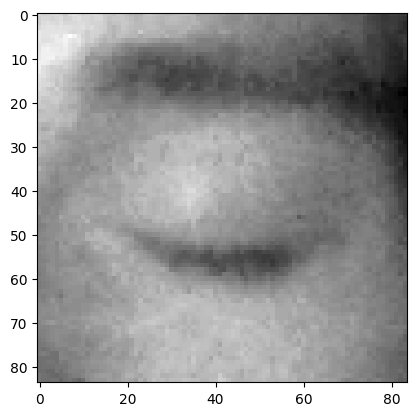

In [ ]:
Datadirectory = '/content/drive/MyDrive/Dataset_update/Train_directory'  # Training Dataset
Classes = ["Closed_Eyes", "Open_Eyes"] # List of Classes

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break          #Used to display only first image
    break

In [ ]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (224,224))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [ ]:
create_training_Data()


In [ ]:
print(len(training_Data))

3598


In [ ]:
import random
random.shuffle(training_Data)

In [ ]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 224, 224, 3)

In [ ]:
X = X/255.0;
Y = np.array(y)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # One Node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:

new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Epoch 1/15
102/102 [==============================] - 379s 4s/step - loss: 0.1179 - accuracy: 0.9623 - val_loss: 0.8219 - val_accuracy: 0.7806
Epoch 2/15
102/102 [==============================] - 366s 4s/step - loss: 0.0522 - accuracy: 0.9799 - val_loss: 1.6180 - val_accuracy: 0.6583
Epoch 3/15
102/102 [==============================] - 370s 4s/step - loss: 0.0381 - accuracy: 0.9895 - val_loss: 0.1829 - val_accuracy: 0.9250
Epoch 4/15
102/102 [==============================] - 365s 4s/step - loss: 0.0310 - accuracy: 0.9914 - val_loss: 0.0767 - val_accuracy: 0.9694
Epoch 5/15
102/102 [==============================] - 365s 4s/step - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0735 - val_accuracy: 0.9806
Epoch 6/15
102/102 [==============================] - 365s 4s/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0756 - val_accuracy: 0.9722
Epoch 7/15
102/102 [==============================] - 362s 4s/step - loss: 0.0260 - accuracy: 0.9932 - val_loss: 0.2729 - val_accuracy: 0.9222

Epoch 1/15
102/102 [==============================] - 377s 4s/step - loss: 0.0249 - accuracy: 0.9910 - val_loss: 3.4981 - val_accuracy: 0.6111
Epoch 2/15
102/102 [==============================] - 381s 4s/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.2324 - val_accuracy: 0.9444
Epoch 3/15
102/102 [==============================] - 372s 4s/step - loss: 0.0092 - accuracy: 0.9957 - val_loss: 0.0800 - val_accuracy: 0.9806
Epoch 4/15
102/102 [==============================] - 373s 4s/step - loss: 5.4326e-04 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9694
Epoch 5/15
102/102 [==============================] - 371s 4s/step - loss: 7.3598e-04 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9778
Epoch 6/15
102/102 [==============================] - 377s 4s/step - loss: 3.2122e-04 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9806
Epoch 7/15
102/102 [==============================] - 378s 4s/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.0962 - val_accu

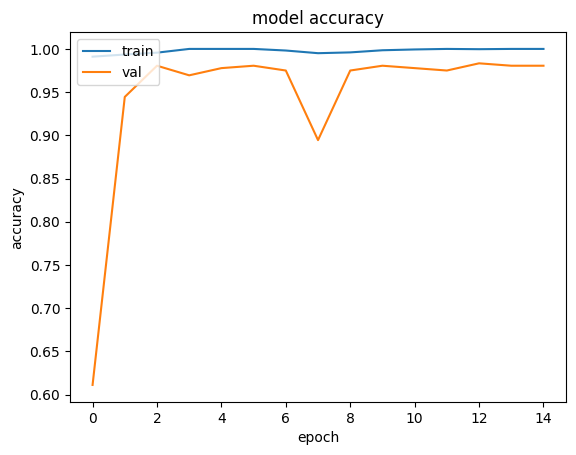

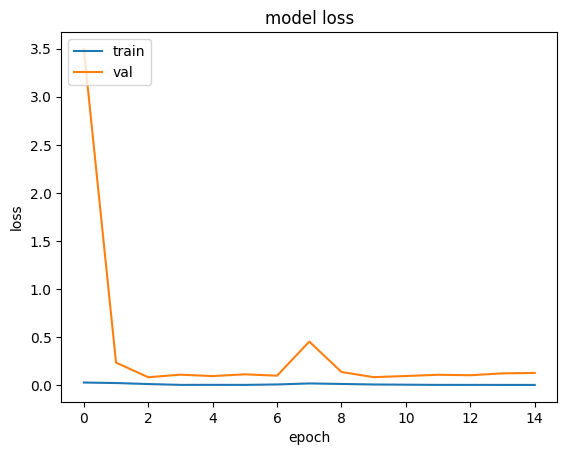

In [ ]:
from matplotlib import pyplot as plt
history = new_model.fit(X,Y,validation_split = 0.1, epochs=15)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
snew_model.save('/content/drive/MyDrive/Dataset_update/Transfer_Learning_Model.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset_update/Transfer_Learning_Model.h5')

In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/Dataset_update/Test_directory/Closed/s0001_01796_0_1_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (224,224))

In [ ]:
X_input = np.array(new_array).reshape(1, 224, 224, 3)

In [ ]:
X_input.shape

(1, 224, 224, 3)

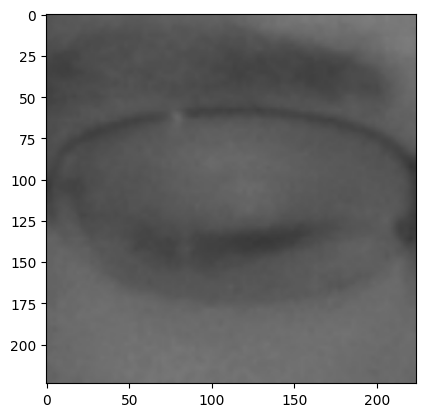

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input = X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 1s 677ms/step


In [ ]:
prediction

array([[6.8946355e-07]], dtype=float32)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Dataset_update/GettyImages-1092658864_hero-1024x575.webp')

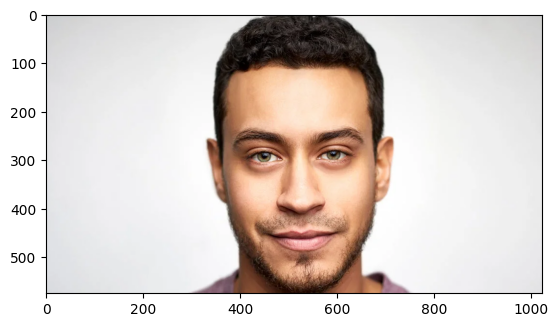

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [ ]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

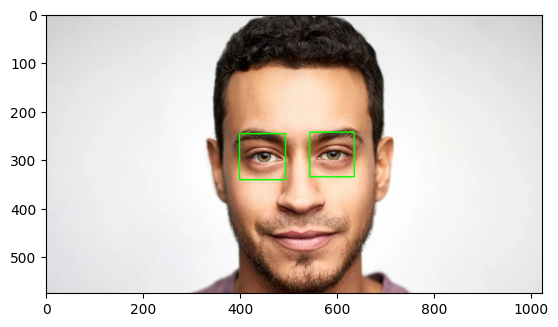

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w] # Region of Interest = ROI
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
#     if len(eyess) == 0:
#         print("Eyes not detected")
#     else:
    for ex, ey, ew, eh in eyess:
        eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]


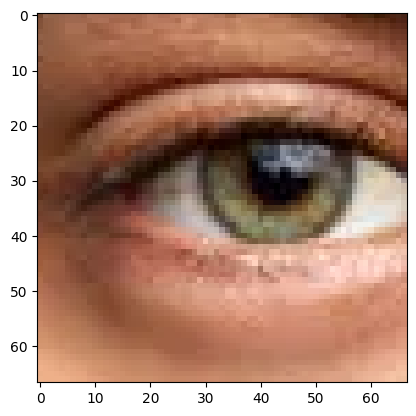

In [ ]:

plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

(67, 67, 3)

In [ ]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
final_image = final_image/255.0

In [ ]:
final_image.shape

(1, 224, 224, 3)

In [ ]:
new_model.predict(final_image)

1/1 [==============================] - 0s 49ms/step


array([[0.99999976]], dtype=float32)